### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

### Import Dataset

In [2]:
data=pd.read_csv(r"C:\rock\heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data

### Column Descriptions:


  1.age 


  2.sex (1 = Male/2 = Female)


  3.cp = chest pain type (4 values)
  
    . 0: Typical angina: chest pain related decrease blood supply to the  heart
  
    . 1: Atypical angina: chest pain not related to heart
    
    . 2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    . 3: Asymptomatic: chest pain not showing signs of disease


  4.trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
  
  
  5.chol-serum cholestoral in mg/dl

    . serum = LDL + HDL + .2 * triglycerides
    
    . above 200 is cause for concern
    
    
  6.fasting blood sugar > 120 mg/dl(1 = true; 0 = false)
  
    . '>126' mg/dL signals diabetes
    

  7.restecg - resting electrocardiographic results (values 0,1,2)
  
    . 0: Nothing to note
    
    . 1: ST-T Wave abnormality
    
       . can range from mild symptoms to severe problems
    
       . signals non-normal heart beat
    
    . 2: Possible or definite left ventricular hypertrophy
    
       . Enlarged heart's main pumping chamber


  8.thalach - maximum heart rate achieved
       
       
  9.exang- exercise induced angina(1 = yes; 0 = no)
       
       
  10.oldpeak = ST depression induced by exercise relative to rest
       
       
  11.slope = the slope of the peak exercise ST segment

      . 0: Upsloping: better heart rate with excercise (uncommon)
      
      . 1: Flatsloping: minimal change (typical healthy heart)
      
      . 2: Downslopins: signs of unhealthy heart
      
  12.ca = number of major vessels (0-3) colored by flourosopy

      . colored vessel means the doctor can see the blood passing through
      
      . the more blood movement the better (no clots)
         
  13.thal:thalium stress result
  
      . 0 = normal
      
      . 1 = fixed defect
      
      .2 = reversable defect      
  
  16.target = have disease or not(1 = yes/0 = no)

## Data information 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Data Processing
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the 'get_dummies' method to create dummy columns for categorical variables.

### Data missing value

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.shape

(1025, 14)

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing steps for numerical and categorical features
numeric_features = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['sex', 'cp' , 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the data
processed_data = preprocessor.fit_transform(data)


In [8]:
categorical_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [9]:
numeric_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
processed_data

array([[-0.26843658, -0.37763552, -0.65933209, ...,  0.        ,
         0.        ,  1.        ],
       [-0.15815703,  0.4791073 , -0.83386117, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.71659547,  0.76468824, -1.39623266, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.81983438, -1.23437834,  0.56237149, ...,  0.        ,
         1.        ,  0.        ],
       [-0.4889957 , -1.23437834,  0.15513696, ...,  0.        ,
         1.        ,  0.        ],
       [-0.04787747, -0.66321646, -1.12474297, ...,  0.        ,
         0.        ,  1.        ]])

## Plotting

### HoloViews allows plotting

the hvPlot API closely mirrors the Pandas plotting API, but instead of generating static images when used in a notebook, it uses HoloViews to generate either static or dynamically streaming Bokeh plots.

In [11]:
import hvplot.pandas

In [64]:
data.target.value_counts().hvplot.bar(
    title='Heart Disease Count',ylabel='count'
    ,width=600,height=450
)

:Bars   [index]   (target)

In [65]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=600, height=450, legend_cols=2, legend_position='top_right'
)

have_disease = data.loc[data['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=600, height=450, legend_cols=2, legend_position='top_right'
)

have_disease = data.loc[data['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

have_disease = data.loc[data['target']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by resting electrocardiographic results", xlabel='resting electrocardiographic results', 
    ylabel='Count', width=600, height=450, legend_cols=2, legend_position='top_right'
)



:Overlay
   .Bars.Restecg.I  :Bars   [index]   (restecg)
   .Bars.Restecg.II :Bars   [index]   (restecg)

In [14]:
import matplotlib.pyplot as plt

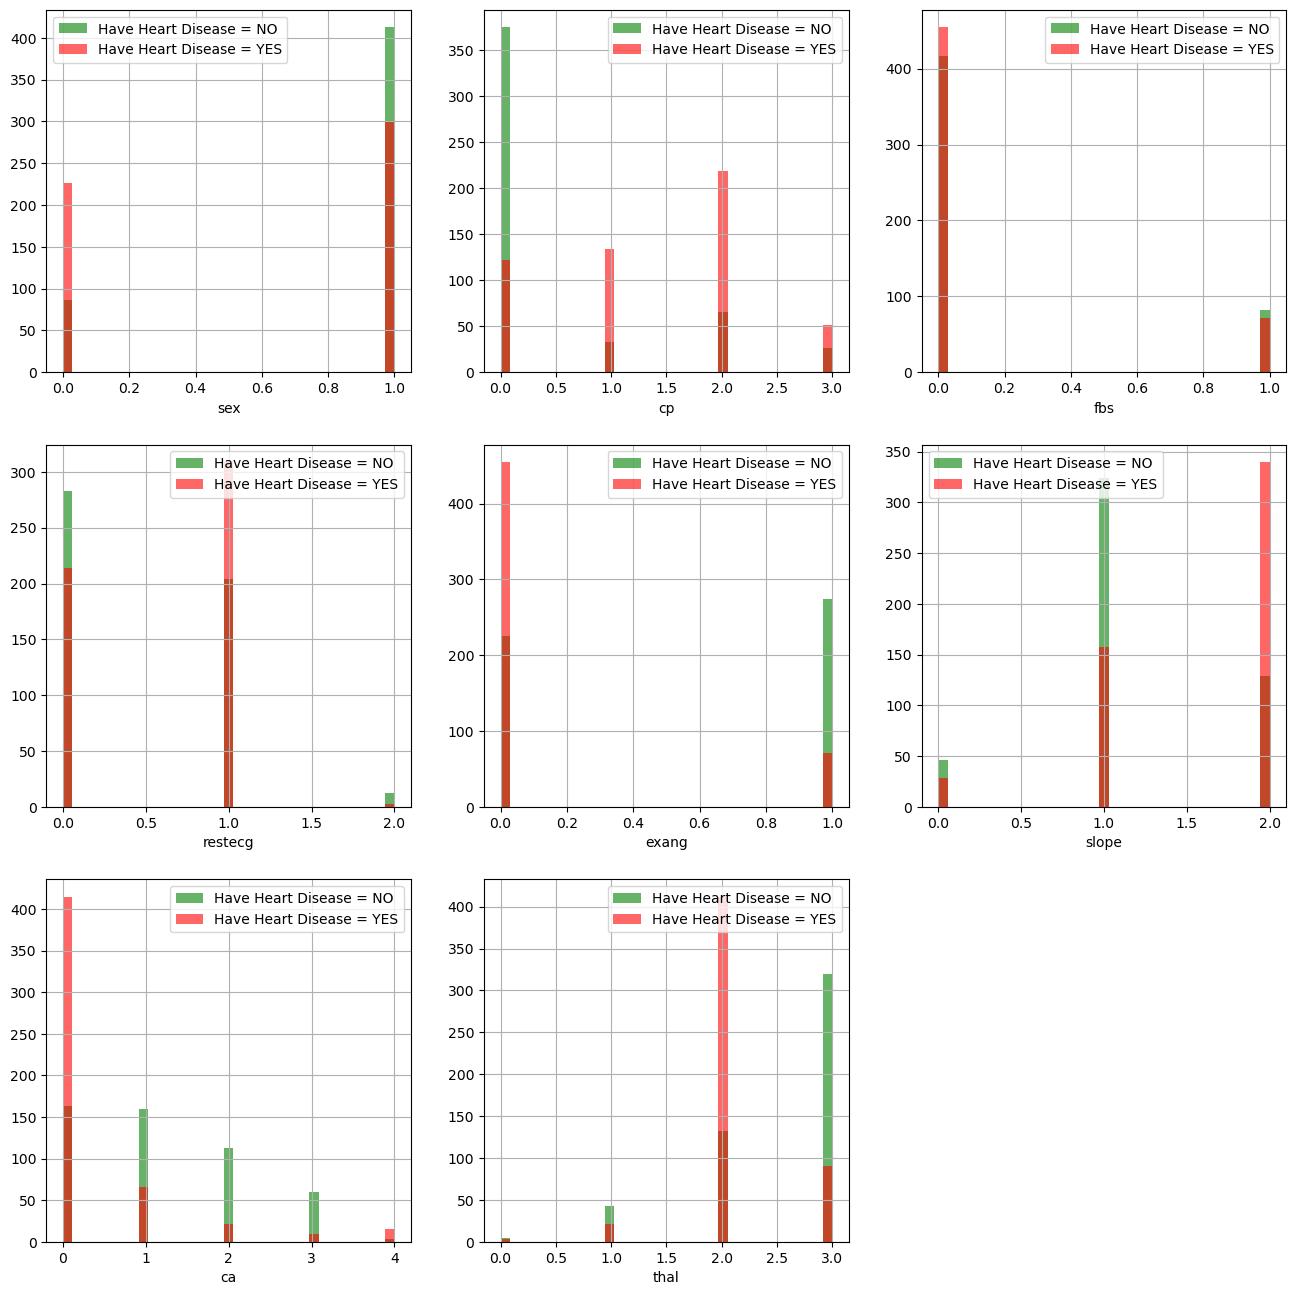

In [15]:
plt.figure(figsize=(16, 16))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [16]:
## check the all columns is taken by X- axis & target is the y-axis (above the data)

## information of above Dataset(heart disease )

.cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.

.restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

.exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)

.slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

.ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.

.thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

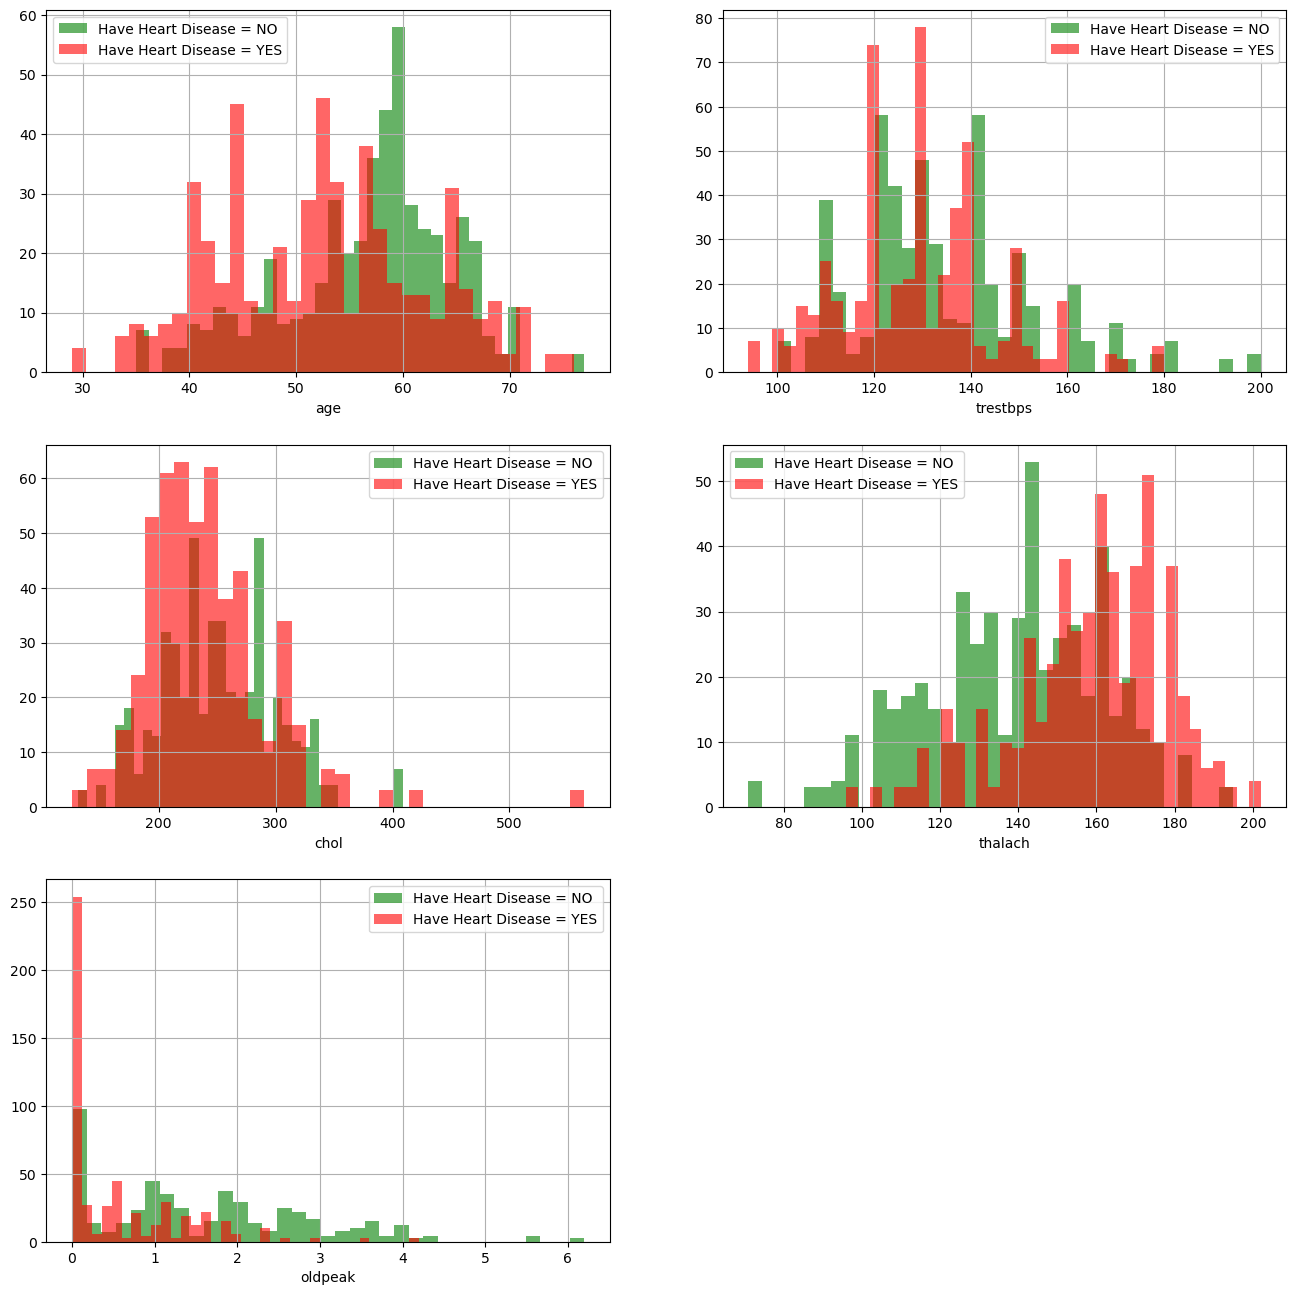

In [17]:
plt.figure(figsize=(16, 16))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### information  of the numerical dataset
.trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

.chol {serum cholestoral in mg/dl} : above 200 is cause for concern.

.thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.

.oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

### Age vs Max heat Rate for Heart Disease

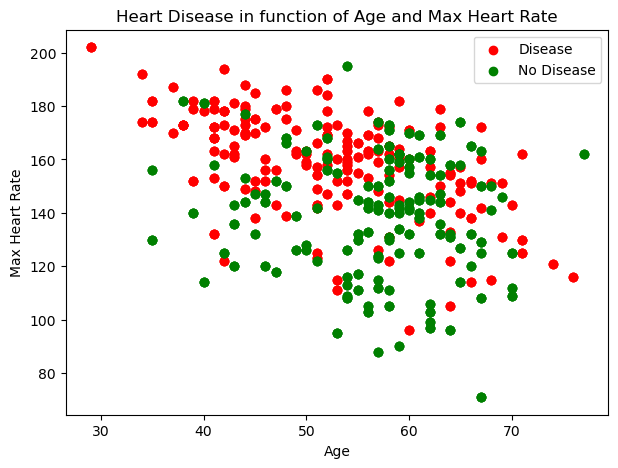

In [60]:
#Create another figure
plt.figure(figsize=(7, 5))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="green")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Correlation matrix

A correlation matrix is simply a table showing the correlation coefficients between variables

In [19]:
import seaborn as sns

(14.5, -0.5)

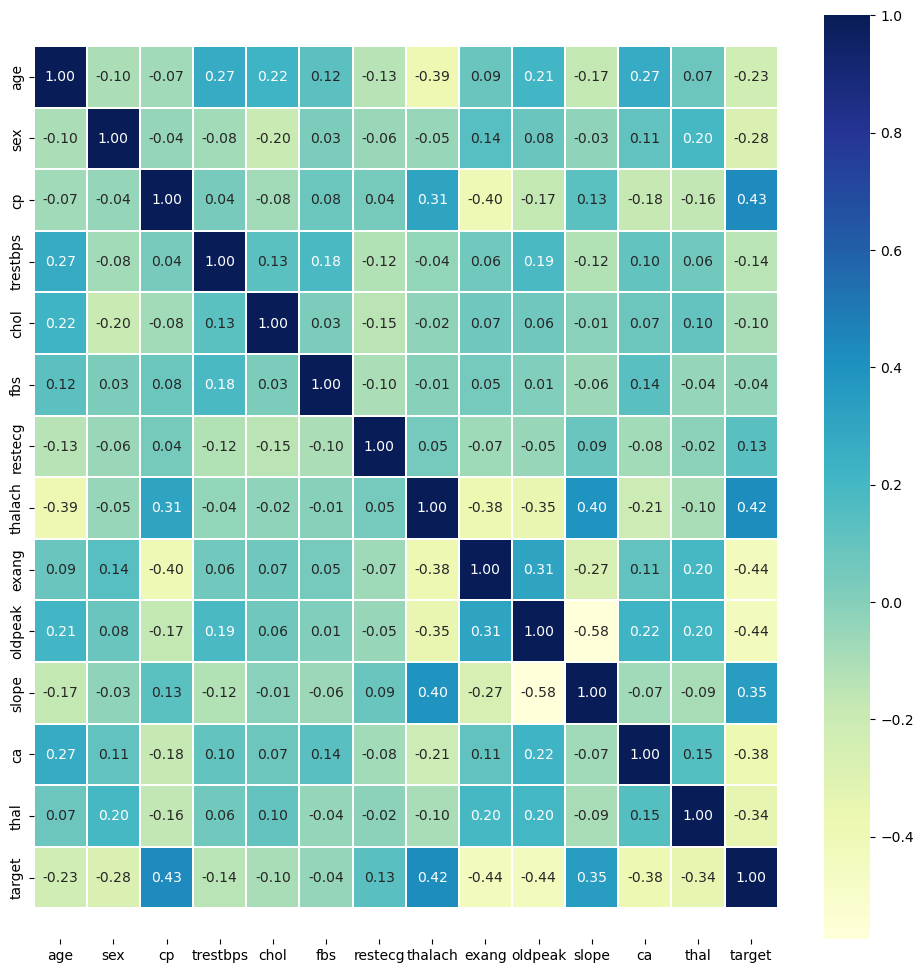

In [63]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.3,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [21]:
data.drop('target', axis=1).corrwith(data.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

### Split Data: Split your dataset into training and testing sets.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_data, data['target'], test_size=0.2, random_state=42)


##Choose a Model: Select a machine learning model appropriate for your problem. For a classification task like predicting heart disease, you might start with a decision tree classifier.
#python


In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()


In [24]:
model

DecisionTreeClassifier()

In [25]:
## Training :Fit the model to your training data

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Evaluation: Evaluate the performance of your model on the testing data.

## Decision Tree classifier

#### Decision Tree clasifier is best Accuary Score 

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [28]:
from sklearn.tree import DecisionTreeClassifier


tc = DecisionTreeClassifier(random_state=42)
tc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print_score(tc, X_train, y_train, X_test, y_test, train=True)
print_score(tc, X_train, y_train, X_test, y_test, train=False)




Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    397.0  423.0       1.0      820.0         820.0
_______________________________________________
Confusion Matrix: 
 [[397   0]
 [  0 423]]

Test Result:
Accuracy Score: 98.54%


In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9853658536585366


## Ⓜ️- Models Hyperparameter Tuning

### Decision Tree Classifier Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best_params: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    397.0  423.0       1.0      820.0         820.0
_______________________________________________
Confusion Matrix: 
 [[397   0]
 [  0 423]]

Test Result:
Accuracy Score: 98.54%


In [33]:
best_params

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

## Final Model: Train your model on the full training set using the best hyperparameters (optional).

In [34]:
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(processed_data, data['target'])


DecisionTreeClassifier(max_depth=11)

In [35]:
final_model

DecisionTreeClassifier(max_depth=11)

In [36]:
accuracy_score(y_pred,y_test)

0.9853658536585366

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

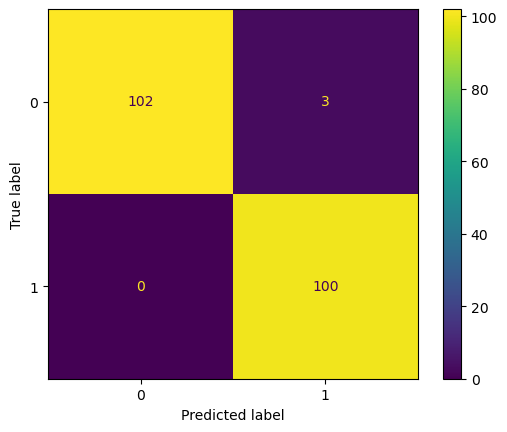

In [39]:
ConfusionMatrixDisplay(confusion_matrix(y_pred,y_test)).plot()

In [40]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [41]:
Prediction = data[['age','cp','sex','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']]
Prediction.head()

,age,cp,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,0,1,125,212,0,1,168,0,1.0,2,2,3,0
1,53,0,1,140,203,1,0,155,1,3.1,0,0,3,0
2,70,0,1,145,174,0,1,125,1,2.6,0,0,3,0
3,61,0,1,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
X = Prediction.drop('target', axis=1)
y = Prediction['target']
X.shape, y.shape

((1025, 13), (1025,))

In [43]:
print(X)

      age  cp  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52   0    1       125   212    0        1      168      0      1.0   
1      53   0    1       140   203    1        0      155      1      3.1   
2      70   0    1       145   174    0        1      125      1      2.6   
3      61   0    1       148   203    0        1      161      0      0.0   
4      62   0    0       138   294    1        1      106      0      1.9   
...   ...  ..  ...       ...   ...  ...      ...      ...    ...      ...   
1020   59   1    1       140   221    0        1      164      1      0.0   
1021   60   0    1       125   258    0        0      141      1      2.8   
1022   47   0    1       110   275    0        0      118      1      1.0   
1023   50   0    0       110   254    0        0      159      0      0.0   
1024   54   0    1       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])# Model

In [47]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [48]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [49]:
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9853658536585366


In [50]:
Prediction.sample()

,age,cp,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
886,61,0,1,120,260,0,1,140,1,3.6,1,1,3,0


In [ ]:
## Creating the pickle file

In [51]:
import pickle
import os

In [52]:
pickle.dump(pipeline,open("Heart.pkl","wb"))

In [53]:
import os
os.getcwd()

'C:\\Users\\manne'

In [54]:
predict=pickle.load(open("Heart.pkl","rb"))

In [55]:
predict.predict(pd.DataFrame([[70,0,1,130,322,0,0,109,0,2.4,1,3,2]],columns=["age","cp","sex","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]))

array([0], dtype=int64)

In [56]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [57]:
## FINAL PROJECT